# Python Project 
### as of 22/2/25

# Importing pandas

In [199]:
import pandas as pd
import datetime

In [200]:
data_df=pd.read_csv('geotracker_sites_2024-11-01(correct encoded).csv').copy()

## Overlook of data set

In [201]:
data_df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaN,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaN,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaN,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaN,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaN,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaN,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31T00:00:00Z,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18T00:00:00Z,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01T00:00:00Z,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


## Gathering first details

In [202]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GLOBAL_ID                          75063 non-null  object 
 1   BUSINESS_NAME                      75059 non-null  object 
 2   STREET_NUMBER                      63339 non-null  object 
 3   STREET_NAME                        73457 non-null  object 
 4   CITY                               75023 non-null  object 
 5   STATE                              75063 non-null  object 
 6   ZIP                                70748 non-null  object 
 7   COUNTY                             75056 non-null  object 
 8   EPA_REGION                         75063 non-null  int64  
 9   LATITUDE                           74437 non-null  float64
 10  LONGITUDE                          74437 non-null  float64
 11  COORDINATE_SOURCE                  60899 non-null  obj

## Counting nulls

In [203]:
data_df.isnull().sum()

GLOBAL_ID                                0
BUSINESS_NAME                            4
STREET_NUMBER                        11724
STREET_NAME                           1606
CITY                                    40
STATE                                    0
ZIP                                   4315
COUNTY                                   7
EPA_REGION                               0
LATITUDE                               626
LONGITUDE                              626
COORDINATE_SOURCE                    14164
CASE_TYPE                                0
STATUS                                   0
STATUS_DATE                              3
CLAIM_NO                             55960
CLAIM_STATUS                         55960
LEAD_AGENCY                            843
CASEWORKER                           25909
LOCAL_AGENCY                         36021
RB_CASE_NUMBER                       18049
LOC_CASE_NUMBER                      39283
FILE_LOCATION                        36853
POTENTIAL_C

## Counting Uniques

In [204]:
data_df.BUSINESS_NAME.nunique()

66005

In [205]:
type(data_df.BUSINESS_NAME.unique())

numpy.ndarray

In [206]:
data_df.CITY.nunique()#i am clearly not getting all the uniques, I was retarded and didnt know nunique() was a thing

2955

In [207]:
data_df.DISCHARGE_CAUSE.nunique()

93

In [208]:
data_df.DISCHARGE_SOURCE.nunique()

43

In [209]:
data_df.STOP_METHOD.nunique()

111

In [210]:
data_df.STOP_METHOD.nunique()

111

In [211]:
data_df['DISADVANTAGED_COMMUNITY'].nunique()

2

In [212]:
data_df['DISADVANTAGED_COMMUNITY'].unique()

array([nan, 'Severely Disadvantaged Community', 'Disadvantaged Community'],
      dtype=object)

## Changing obeject types for date columns

In [213]:
data_df.STATUS_DATE=pd.to_datetime(data_df.STATUS_DATE,dayfirst=True)

In [214]:
data_df.BEGIN_DATE=pd.to_datetime(data_df.BEGIN_DATE,dayfirst=True)

In [215]:
data_df.LEAK_REPORTED_DATE

0                         NaN
1                         NaN
2                         NaN
3        2006-02-28T00:00:00Z
4        2014-11-03T00:00:00Z
                 ...         
75058    1965-01-02T00:00:00Z
75059                     NaN
75060    1998-07-06T00:00:00Z
75061    2008-04-17T00:00:00Z
75062    2004-04-16T00:00:00Z
Name: LEAK_REPORTED_DATE, Length: 75063, dtype: object

In [216]:
data_df.LEAK_REPORTED_DATE=pd.to_datetime(data_df.LEAK_REPORTED_DATE,dayfirst=False)

In [217]:
data_df.LEAK_REPORTED_DATE=data_df.LEAK_REPORTED_DATE.dt.date

In [218]:
data_df.LEAK_REPORTED_DATE=pd.to_datetime(data_df.LEAK_REPORTED_DATE)

In [219]:
data_df.NO_FURTHER_ACTION_DATE=pd.to_datetime(data_df.NO_FURTHER_ACTION_DATE,dayfirst=False)

In [220]:
data_df.NO_FURTHER_ACTION_DATE = data_df.NO_FURTHER_ACTION_DATE.dt.date

In [221]:
data_df.NO_FURTHER_ACTION_DATE=pd.to_datetime(data_df.NO_FURTHER_ACTION_DATE)

In [222]:
data_df.NO_FURTHER_ACTION_DATE

0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
75058          NaT
75059   1999-03-31
75060   2013-03-18
75061   2009-04-01
75062   2006-06-23
Name: NO_FURTHER_ACTION_DATE, Length: 75063, dtype: datetime64[ns]

In [223]:
data_df[['LEAK_REPORTED_DATE',"STATUS_DATE",'BEGIN_DATE','NO_FURTHER_ACTION_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75063 entries, 0 to 75062
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   LEAK_REPORTED_DATE      54371 non-null  datetime64[ns]
 1   STATUS_DATE             75060 non-null  datetime64[ns]
 2   BEGIN_DATE              71202 non-null  datetime64[ns]
 3   NO_FURTHER_ACTION_DATE  58411 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 2.3 MB


In [224]:
data_df[['LEAK_REPORTED_DATE',"STATUS_DATE",'BEGIN_DATE','NO_FURTHER_ACTION_DATE']]

,LEAK_REPORTED_DATE,STATUS_DATE,BEGIN_DATE,NO_FURTHER_ACTION_DATE
0,NaT,2022-04-01,2009-05-11,NaT
1,NaT,2023-02-28,2019-03-06,NaT
2,NaT,2024-09-01,2014-12-01,NaT
3,2006-02-28,2006-02-28,2006-02-28,NaT
4,2014-11-03,2014-12-08,2014-11-03,NaT
...,...,...,...,...
75058,1965-01-02,1998-03-28,1998-03-27,NaT
75059,NaT,1999-03-31,1999-03-31,1999-03-31
75060,1998-07-06,2013-03-18,1998-07-06,2013-03-18
75061,2008-04-17,2009-04-01,2007-07-29,2009-04-01


In [225]:
data_df_nomissing_dates=data_df[['LEAK_REPORTED_DATE',"STATUS_DATE",'BEGIN_DATE','NO_FURTHER_ACTION_DATE']].dropna()

In [226]:
data_df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaT,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaT,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaT,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaT,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaT,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaT,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


In [227]:
data_df_nomissing_dates

,LEAK_REPORTED_DATE,STATUS_DATE,BEGIN_DATE,NO_FURTHER_ACTION_DATE
213,1991-11-26,1996-03-19,1991-10-02,1996-03-19
214,1988-07-18,1996-03-19,1988-07-14,1996-03-19
218,1991-12-02,1996-03-19,1991-10-17,1996-03-19
221,1989-12-04,1996-03-19,1989-12-04,1996-03-19
226,1990-06-22,1996-03-19,1989-09-22,1996-03-19
...,...,...,...,...
75056,1965-01-02,1995-06-16,1987-04-07,1995-06-16
75057,1990-09-11,1998-12-16,1990-09-11,1998-12-16
75060,1998-07-06,2013-03-18,1998-07-06,2013-03-18
75061,2008-04-17,2009-04-01,2007-07-29,2009-04-01


Possible columns to ignore to go through with Arwa, CLAIM_NO, each row is already a claim so no need for it seeing that 55960 are null. CLAIM_STATUS? S:W, CALWATER_WATERSHED_NAME,SUBBASIN_NAME
cal enviroscreen https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40
https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40summaryofchangesf2021.pdf
calenviro3 is old calc
4 is new calc based on 132 new contaminats added to database

Disadvantaged Communities (DACs)
A community is considered a DAC if its CalEnviroScreen 4.0 score is in the top 25% statewide.
This means a CES4.0 percentile of ≥ 75% (e.g., "75-80%", "95-100%").
Severely Disadvantaged Communities (SDACs)
SDACs are NOT directly determined by CalEnviroScreen scores.
Instead, they are based on Median Household Income (MHI) ≤ 60% of the state median (from other datasets like Census data).
However, SDACs often overlap with DACs since high CES scores correlate with lower-income areas.
Key Takeaway
If "CALENVIROSCREEN4_SCORE" is ≥ 75%, the community is a DAC.
SDACs require income data, so CES4.0 alone isn't enough to classify them.
https://sgc.ca.gov/technical-assistance/toolkit/definitions.html?utm_source=chatgpt.com

# Q1 days taken to report if any and days to rectify if done

In [228]:
data_df

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,STOP_DESCRIPTION,NO_FURTHER_ACTION_DATE,CALWATER_WATERSHED_NAME,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,NaN,NaT,Salinas - Paso Robles - Atascadero (309.81),Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3)
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,NaN,NaT,Russian River - Middle Russian River - Santa R...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1)
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,NaN,NaT,Estero Bay - Point Buchon - San Luis Obispo Cr...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3)
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,NaN,NaT,San Joaquin Valley Floor - Merced (535.80),San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F)
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,unknown,NaT,Santa Clara - Palo Alto (205.50),Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75058,SLT5S0753116,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,NaN,HIGHWAY 33,Patterson,CA,NaN,Stanislaus,9,37.472398,...,NaN,NaT,Delta-Mendota Canal - Patterson (541.10),San Joaquin Valley - Delta-Mendota (5-022.07),Disadvantaged Community,81-85%,60-65%,No,NaN,CENTRAL VALLEY RWQCB (REGION 5S)
75059,DOD100037100,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,NaN,Box 555008,Camp Pendleton,CA,92055-5008,San Diego,9,33.395000,...,NaN,1999-03-31,San Juan - San Mateo Canyon (901.40),San Mateo Valley (9-002),NaN,26-30%,45-50%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)
75060,T0604500317,CDF HOPLAND,11000,"HIGHWAY 101, SOUTH",HOPLAND,CA,95490,Mendocino,9,39.003077,...,NaN,2013-03-18,Russian River - Upper Russian River - Ukiah (1...,NaN,NaN,16-20%,10-15%,No,NaN,NORTH COAST RWQCB (REGION 1)
75061,T10000000477,Imperial Beach Naval Auxiliary Landing Field (...,NaN,BLDG 183A,IMPERIAL BEACH,CA,91932,San Diego,9,32.567051,...,Tank removed,2009-04-01,Tijuana - Tijuana Valley - San Ysidro (911.11),Coastal Plain Of San Diego (9-033),NaN,26-30%,55-60%,Yes,NaN,SAN DIEGO RWQCB (REGION 9)


In [229]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION'],
      dtype='object')

In [230]:
X=data_df['BEGIN_DATE']-data_df['LEAK_REPORTED_DATE'] #begin date is the date the case was opened once the leak was discovered

In [231]:
data_df['DAYS_TO_REPORT_LEAK']=X

In [232]:
data_df[['DAYS_TO_REPORT_LEAK']]

,DAYS_TO_REPORT_LEAK
0,NaT
1,NaT
2,NaT
3,0 days
4,0 days
...,...
75058,12137 days
75059,NaT
75060,0 days
75061,-263 days


In [233]:
Y=data_df['NO_FURTHER_ACTION_DATE']-data_df['BEGIN_DATE']

In [234]:
data_df['DAYS_TO_NO_FURTHER_ACTION']=Y

In [235]:
data_df.groupby('COUNTY')[['DAYS_TO_REPORT_LEAK']].mean().sort_values('DAYS_TO_REPORT_LEAK')

,DAYS_TO_REPORT_LEAK
COUNTY,
Santa Cruz,-495 days +05:01:23.720930232
Alpine,-256 days +20:00:00
Monterey,-248 days +10:30:41.860465116
San Bernardino,-182 days +04:18:47.516778524
Mono,-161 days +15:28:25.263157894
Del Norte,-159 days +03:15:55.102040816
Inyo,-145 days +18:40:00
Humboldt,-129 days +13:07:48.161434978
Mariposa,-121 days +19:23:38.181818182


In [236]:
data_df.groupby(['COUNTY','CITY','BUSINESS_NAME'])[['DAYS_TO_REPORT_LEAK']].agg('min').sort_values('DAYS_TO_REPORT_LEAK')
#data_df.groupby(['COUNTY','CITY','BUSINESS_NAME'])[['DAYS_TO_REPORT_LEAK']].agg('max').sort_values('DAYS_TO_REPORT_LEAK')

DAYS_TO_REPORT_LEAK
COUNTY          CITY          BUSINESS_NAME                                                         
San Luis Obispo Paso Robles   Ennis Business Forms, Inc.                                 -17238 days
Santa Barbara   Santa Barbara City of Santa Barbara (sidewalk UST)                       -16391 days
Contra Costa    El Cerrito    RC Imports                                                 -16027 days
Humboldt        Arcata        Franklins Service                                          -15122 days
San Bernardino  Hinkley       PG&E Former Waste Pit/ MW-163S/D Investigations...         -14766 days
...                                                                                              ...
Yuba            Olivehurst    Olivehurst Unknown PCE                                             NaT
                              Olivehurst WWTP                                                    NaT
                Smartsville   Hammonton Gold Village WWTP                                        NaT
                WHEATLAND     BLACK EARTH COMPOSTING FAC                                         NaT
                Wheatland     Recology Ostrom Organics                                           NaT

[69752 rows x 1 columns]

# Q2 Which company had the most leaks

In [237]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION'],
      dtype='object')

In [238]:
data_df.groupby(['BUSINESS_NAME'])['GLOBAL_ID'].count().sort_values(ascending=False)

BUSINESS_NAME
PRIVATE RESIDENCE                959
SHELL                            280
SHELL SERVICE STATION            169
Residence                        168
CHEVRON                          166
                                ... 
Edwards Air Force Base - PRL4      1
Edwards Air Force Base - PRL5      1
Edwards Air Force Base - PRL6      1
Edwards Air Force Base - PRL7      1
victory salvage, inc               1
Name: GLOBAL_ID, Length: 66005, dtype: int64

# Q3 Which companies didnt disclose the types of contaminants that leaked

In [239]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION'],
      dtype='object')

In [240]:
data_df['BOOL']=data_df['POTENTIAL_CONTAMINANTS_OF_CONCERN'].isnull()

In [241]:
missing_contam_df=data_df[['BUSINESS_NAME','COUNTY','CITY','POTENTIAL_CONTAMINANTS_OF_CONCERN','BOOL']]

In [242]:
missing_contam_df

,BUSINESS_NAME,COUNTY,CITY,POTENTIAL_CONTAMINANTS_OF_CONCERN,BOOL
0,Fort Hunter Liggett - Fort Hunter Liggett - LA...,Monterey,Jolon,"Other Solvent or Non-Petroleum Hydrocarbon, Ot...",False
1,McPhail's,Sonoma,Santa Rosa,"Asphalt, Diesel, Heating Oil / Fuel Oil, Keros...",False
2,San Luis Obispo WWTP,San Luis Obispo,San Luis Obispo,NaN,True
3,SMOTHERS DELUXE SHELL,Merced,MERCED,"Gasoline, Heating Oil / Fuel Oil",False
4,One Lawrence Station,Santa Clara,Santa Clara,"Trichloroethylene (TCE), DDD / DDE / DDT",False
...,...,...,...,...,...
75058,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,Stanislaus,Patterson,NaN,True
75059,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,San Diego,Camp Pendleton,NaN,True
75060,CDF HOPLAND,Mendocino,HOPLAND,NaN,True
75061,Imperial Beach Naval Auxiliary Landing Field (...,San Diego,IMPERIAL BEACH,"Diesel, Heating Oil / Fuel Oil",False


In [243]:
missing_contam_df.groupby(['BUSINESS_NAME'])['BOOL'].sum().sort_values(ascending=False)

BUSINESS_NAME
PRIVATE RESIDENCE                          117
Edwards Air Force Base - 7 - Site CWM-A     24
EAST VILLAGE RDA                            22
Commercial Property                         10
Commercial                                  10
                                          ... 
Former Arnold Cleaners                       0
Former Artistic Body and Paint               0
Former Arya Cleaners                         0
Former Asphalt Plant                         0
victory salvage, inc                         0
Name: BOOL, Length: 66005, dtype: int64

# Q4 Difference in calscore3 and 4? What does it signify 

In [244]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION', 'BOOL'],
      dtype='object'

In [245]:
#actual correct df
no_null_scores=data_df[['BUSINESS_NAME','COUNTY','CITY','CALENVIROSCREEN3_SCORE','CALENVIROSCREEN4_SCORE']][data_df['CALENVIROSCREEN3_SCORE'].notna() & data_df['CALENVIROSCREEN4_SCORE'].notna()]

In [246]:
no_null_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69502 entries, 0 to 75062
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BUSINESS_NAME           69498 non-null  object
 1   COUNTY                  69501 non-null  object
 2   CITY                    69480 non-null  object
 3   CALENVIROSCREEN3_SCORE  69502 non-null  object
 4   CALENVIROSCREEN4_SCORE  69502 non-null  object
dtypes: object(5)
memory usage: 3.2+ MB


In [247]:
XY=no_null_scores['CALENVIROSCREEN3_SCORE'].apply(lambda value: value.split()[0].split('-')[1].split('%')[0])

In [248]:
no_null_scores['CALENVIROSCREEN3_SCORE']=XY.apply(int)


In [249]:
ZX=no_null_scores['CALENVIROSCREEN4_SCORE'].apply(lambda value: value.split()[0].split('-')[1].split('%')[0])

In [250]:
no_null_scores['CALENVIROSCREEN4_SCORE']=ZX.apply(int)

In [251]:
no_null_scores

,BUSINESS_NAME,COUNTY,CITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE
0,Fort Hunter Liggett - Fort Hunter Liggett - LA...,Monterey,Jolon,45,50
1,McPhail's,Sonoma,Santa Rosa,25,25
2,San Luis Obispo WWTP,San Luis Obispo,San Luis Obispo,20,40
3,SMOTHERS DELUXE SHELL,Merced,MERCED,95,100
4,One Lawrence Station,Santa Clara,Santa Clara,40,40
...,...,...,...,...,...
75058,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,Stanislaus,Patterson,85,65
75059,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,San Diego,Camp Pendleton,30,50
75060,CDF HOPLAND,Mendocino,HOPLAND,20,15
75061,Imperial Beach Naval Auxiliary Landing Field (...,San Diego,IMPERIAL BEACH,30,60


In [252]:
no_null_scores['SCORE_DIFF_%']=no_null_scores['CALENVIROSCREEN4_SCORE']-no_null_scores['CALENVIROSCREEN3_SCORE']

In [253]:
no_null_scores

,BUSINESS_NAME,COUNTY,CITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,SCORE_DIFF_%
0,Fort Hunter Liggett - Fort Hunter Liggett - LA...,Monterey,Jolon,45,50,5
1,McPhail's,Sonoma,Santa Rosa,25,25,0
2,San Luis Obispo WWTP,San Luis Obispo,San Luis Obispo,20,40,20
3,SMOTHERS DELUXE SHELL,Merced,MERCED,95,100,5
4,One Lawrence Station,Santa Clara,Santa Clara,40,40,0
...,...,...,...,...,...,...
75058,CHEVRON PIPELINE CO - FORMER STANDARD OIL PIPE...,Stanislaus,Patterson,85,65,-20
75059,Camp Pendleton Marine Corps Base (MCB) - OU 3 ...,San Diego,Camp Pendleton,30,50,20
75060,CDF HOPLAND,Mendocino,HOPLAND,20,15,-5
75061,Imperial Beach Naval Auxiliary Landing Field (...,San Diego,IMPERIAL BEACH,30,60,30


In [254]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION', 'BOOL'],
      dtype='object'

In [255]:
data_df.DISADVANTAGED_COMMUNITY.info()

<class 'pandas.core.series.Series'>
RangeIndex: 75063 entries, 0 to 75062
Series name: DISADVANTAGED_COMMUNITY
Non-Null Count  Dtype 
--------------  ----- 
13960 non-null  object
dtypes: object(1)
memory usage: 586.6+ KB


# Maps

In [256]:
import folium

In [257]:
data_df.head(5)

,GLOBAL_ID,BUSINESS_NAME,STREET_NUMBER,STREET_NAME,CITY,STATE,ZIP,COUNTY,EPA_REGION,LATITUDE,...,DWR_GROUNDWATER_SUBBASIN_NAME,DISADVANTAGED_COMMUNITY,CALENVIROSCREEN3_SCORE,CALENVIROSCREEN4_SCORE,MILITARY_DOD_SITE,FACILITY_PROJECT_SUBTYPE,RWQCB_REGION,DAYS_TO_REPORT_LEAK,DAYS_TO_NO_FURTHER_ACTION,BOOL
0,DOD100186700,Fort Hunter Liggett - Fort Hunter Liggett - LA...,NaN,NaN,Jolon,CA,-93928,Monterey,9,35.975332,...,Lockwood Valley (3-006),NaN,41-45%,45-50%,Yes,NaN,CENTRAL COAST RWQCB (REGION 3),NaT,NaT,False
1,T10000012752,McPhail's,975,Wright Street,Santa Rosa,CA,95407,Sonoma,9,38.452190,...,Santa Rosa Valley - Santa Rosa Plain (1-055.01),NaN,21-25%,20-25%,No,NaN,NORTH COAST RWQCB (REGION 1),NaT,NaT,False
2,NPD100051582,San Luis Obispo WWTP,35,Prado Road,San Luis Obispo,CA,93401,San Luis Obispo,9,35.256328,...,San Luis Obispo Valley (3-009),NaN,16-20%,35-40%,No,NaN,CENTRAL COAST RWQCB (REGION 3),NaT,NaT,True
3,T0604762455,SMOTHERS DELUXE SHELL,55,WEST 16TH STREET,MERCED,CA,95340,Merced,9,37.298192,...,San Joaquin Valley - Merced (5-022.04),Severely Disadvantaged Community,91-95%,95-100% (highest scores),No,NaN,CENTRAL VALLEY RWQCB (REGION 5F),0 days,NaT,False
4,T10000006370,One Lawrence Station,3305,Kifer Road,Santa Clara,CA,95051,Santa Clara,9,37.374631,...,Santa Clara Valley - Santa Clara (2-009.02),NaN,36-40%,35-40%,No,NaN,SAN FRANCISCO BAY RWQCB (REGION 2),0 days,NaT,False


In [258]:
data_df.columns

Index(['GLOBAL_ID', 'BUSINESS_NAME', 'STREET_NUMBER', 'STREET_NAME', 'CITY',
       'STATE', 'ZIP', 'COUNTY', 'EPA_REGION', 'LATITUDE', 'LONGITUDE',
       'COORDINATE_SOURCE', 'CASE_TYPE', 'STATUS', 'STATUS_DATE', 'CLAIM_NO',
       'CLAIM_STATUS', 'LEAD_AGENCY', 'CASEWORKER', 'LOCAL_AGENCY',
       'RB_CASE_NUMBER', 'LOC_CASE_NUMBER', 'FILE_LOCATION',
       'POTENTIAL_CONTAMINANTS_OF_CONCERN', 'QUANTITY_RELEASED_GALLONS',
       'POTENTIAL_MEDIA_OF_CONCERN', 'SITE_HISTORY', 'BEGIN_DATE',
       'LEAK_REPORTED_DATE', 'HOW_DISCOVERED', 'HOW_DISCOVERED_DESCRIPTION',
       'DISCHARGE_SOURCE', 'DISCHARGE_CAUSE', 'STOP_METHOD',
       'STOP_DESCRIPTION', 'NO_FURTHER_ACTION_DATE', 'CALWATER_WATERSHED_NAME',
       'DWR_GROUNDWATER_SUBBASIN_NAME', 'DISADVANTAGED_COMMUNITY',
       'CALENVIROSCREEN3_SCORE', 'CALENVIROSCREEN4_SCORE', 'MILITARY_DOD_SITE',
       'FACILITY_PROJECT_SUBTYPE', 'RWQCB_REGION', 'DAYS_TO_REPORT_LEAK',
       'DAYS_TO_NO_FURTHER_ACTION', 'BOOL'],
      dtype='object'

In [259]:
for_map= data_df[['COUNTY','LATITUDE','LONGITUDE']].dropna().copy()
for_map.head()

,COUNTY,LATITUDE,LONGITUDE
0,Monterey,35.975332,-121.215291
1,Sonoma,38.452190,-122.709840
2,San Luis Obispo,35.256328,-120.673299
3,Merced,37.298192,-120.477262
4,Santa Clara,37.374631,-121.987424


In [260]:
coordinates=pd.MultiIndex.from_arrays([for_map['LATITUDE'], for_map['LONGITUDE']])

In [261]:
for_map['Location']=coordinates

In [262]:
for_map.head()

,COUNTY,LATITUDE,LONGITUDE,Location
0,Monterey,35.975332,-121.215291,"(35.97533201, -121.215291)"
1,Sonoma,38.452190,-122.709840,"(38.45219, -122.70984)"
2,San Luis Obispo,35.256328,-120.673299,"(35.256328, -120.673299)"
3,Merced,37.298192,-120.477262,"(37.29819179, -120.4772618)"
4,Santa Clara,37.374631,-121.987424,"(37.37463138, -121.9874242)"


In [263]:
for_map[['LATITUDE','LONGITUDE']].dropna()

,LATITUDE,LONGITUDE
0,35.975332,-121.215291
1,38.452190,-122.709840
2,35.256328,-120.673299
3,37.298192,-120.477262
4,37.374631,-121.987424
...,...,...
75058,37.472398,-121.130123
75059,33.395000,-117.580100
75060,39.003077,-123.120089
75061,32.567051,-117.102081


In [264]:
data_df[['COUNTY','LATITUDE','LONGITUDE']][(data_df['COUNTY']=='San Diego')|(data_df['COUNTY']=='San Francisco')|(data_df['COUNTY']=='Los Angeles')]

,COUNTY,LATITUDE,LONGITUDE
8,Los Angeles,34.077549,-118.137629
10,San Francisco,37.746900,-122.388056
16,San Diego,32.630810,-117.100697
21,Los Angeles,34.273457,-118.424497
43,San Francisco,37.762647,-122.434552
...,...,...,...
75054,Los Angeles,34.086238,-118.286708
75056,San Francisco,37.776778,-122.417507
75059,San Diego,33.395000,-117.580100
75061,San Diego,32.567051,-117.102081


In [265]:
#Los angeles -?34.0549° N, 118.2426
#San Francisco-37.7749° N, 122.4194° W
#San Diego-32.7157° N, 117.1611° W


for_map_= {'County': ['Los Angeles', 'San Francisco', 'San Diego'], 'Latitude': [34.0549,37.7749,32.7157], 'Longitude':[-118.2426,-122.4194,-117.1611]}
for_map_df=pd.DataFrame(for_map_)

In [266]:
#folium.Map(location=(for_map.Location), zoom_control=False)
# for i in for_map.Location:
#     m = folium.Map(location=[for_map.LATITUDE.tolist()[0], for_map.LONGITUDE.tolist()[0]])
#     i=i+1
# ... (your existing code to create the for_map DataFrame) ...

# 1. Create the map *outside* the loop, using the first coordinates for initial center
m = folium.Map(location=[for_map_df.Latitude.iloc[0], for_map_df.Longitude.iloc[0]], zoom_start=10) # Added zoom

# 2. Iterate through the DataFrame and add markers
for index, row in for_map_df.iterrows():  # Use iterrows() to get index and row
    lat = row['Latitude'] # Access by column name
    lon = row['Longitude']
    location = row['County']

    # Create a popup with relevant information.
    popup_text = f"Location: {location}<br>Latitude: {lat}<br>Longitude: {lon}"  # Formatted popup

    folium.Marker([lat, lon], popup=popup_text,icon=folium.Icon(color="green", icon="ok-sign"),).add_to(m)


# 3. Save the map to an HTML file *after* the loop
m.save("map3.html")
m.save('map4.png')
print("Map saved to map.html")
  

Map saved to map.html


### Map Stuff
- San Diego -> Top in: Gasoline + Waste Oil / Motor / Hydraulic / Lubricating
- San Francisco -> Top in: Diesel + Heating Oil / Fuel Oil
- Los angelos -> Top in: Other Solvent or Non-Petroleum Hydrocarbon

In [267]:
m = folium.Map(location=[for_map.LATITUDE.iloc[0], for_map.LONGITUDE.iloc[0]], zoom_start=10) 
m

In [268]:
no_null_scores.sort_values('SCORE_DIFF_%').head(20)
no_null_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69502 entries, 0 to 75062
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BUSINESS_NAME           69498 non-null  object
 1   COUNTY                  69501 non-null  object
 2   CITY                    69480 non-null  object
 3   CALENVIROSCREEN3_SCORE  69502 non-null  int64 
 4   CALENVIROSCREEN4_SCORE  69502 non-null  int64 
 5   SCORE_DIFF_%            69502 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.7+ MB


In [269]:
df_filtered_pos= no_null_scores['SCORE_DIFF_%'][no_null_scores['SCORE_DIFF_%'] >= 0].dropna().sort_values(ascending=False).copy()

In [270]:
df_filtered_pos.head()

6222     65
6354     60
21082    55
45210    55
32049    55
Name: SCORE_DIFF_%, dtype: int64

In [271]:
df_filtered_neg= no_null_scores['SCORE_DIFF_%'][no_null_scores['SCORE_DIFF_%'] < 0].dropna().sort_values().copy()

<Axes: >

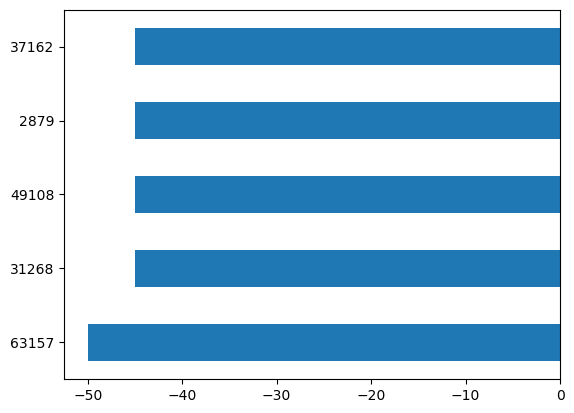

In [272]:
df_filtered_neg.head().plot(kind='barh')

In [273]:
import matplotlib as mtp

In [274]:
to_group_df=data_df[['COUNTY','LATITUDE','LONGITUDE']].dropna()

In [275]:
to_group_df

,COUNTY,LATITUDE,LONGITUDE
0,Monterey,35.975332,-121.215291
1,Sonoma,38.452190,-122.709840
2,San Luis Obispo,35.256328,-120.673299
3,Merced,37.298192,-120.477262
4,Santa Clara,37.374631,-121.987424
...,...,...,...
75058,Stanislaus,37.472398,-121.130123
75059,San Diego,33.395000,-117.580100
75060,Mendocino,39.003077,-123.120089
75061,San Diego,32.567051,-117.102081


In [276]:
to_group_df_mean=to_group_df.groupby('COUNTY').mean()

to_group_df_mean

,LATITUDE,LONGITUDE
COUNTY,,
Alameda,37.732668,-122.154106
Alpine,38.644490,-119.916569
Amador,38.386444,-120.772194
Butte,39.623143,-121.710741
Calaveras,38.182659,-120.579596
Colusa,39.144296,-122.107645
Contra Costa,37.955028,-122.107553
Del Norte,41.759671,-124.155708
El Dorado,38.823882,-120.406945


In [278]:
# #folium.Map(location=(for_map.Location), zoom_control=False)
# # for i in for_map.Location:
# #     m = folium.Map(location=[for_map.LATITUDE.tolist()[0], for_map.LONGITUDE.tolist()[0]])
# #     i=i+1
# # ... (your existing code to create the for_map DataFrame) ...

# # 1. Create the map *outside* the loop, using the first coordinates for initial center
# m3 = folium.Map(location=[to_group_df_mean.LATITUDE.iloc[0], to_group_df_mean.LONGITUDE.iloc[0]], zoom_start=10) # Added zoom

# # 2. Iterate through the DataFrame and add markers
# for index, row in to_group_df_mean.iterrows():  # Use iterrows() to get index and row
#     lat = row['LATITUDE'] # Access by column name
#     lon = row['LONGITUDE']
#     location = row['COUNTY']

#     # Create a popup with relevant information.
#     popup_text = f"Location: {location}<br>Latitude: {lat}<br>Longitude: {lon}"  # Formatted popup

#     folium.Marker([lat, lon], popup=popup_text,icon=folium.Icon(color="green", icon="ok-sign"),).add_to(m3)


# # 3. Save the map to an HTML file *after* the loop
# m3.save("mapfirst.html")

# print("Map saved to map1.html")
  

In [281]:
# from folium.plugins import MarkerCluster

# # Assuming you have your to_group_df DataFrame

# m3 = folium.Map(location=[to_group_df_mean.LATITUDE.iloc[0], to_group_df_mean.LONGITUDE.iloc[0]], zoom_start=10)

# marker_cluster = MarkerCluster().add_to(m3)  # Create a MarkerCluster

# for index, row in to_group_df_mean.iterrows():
#     lat = row['LATITUDE']
#     lon = row['LONGITUDE']
#     location = row['COUNTY']

#     popup_text = f"Location: {location}<br>Latitude: {lat}<br>Longitude: {lon}"

#     folium.Marker([lat, lon], popup=popup_text, icon=folium.Icon(color="green", icon="ok-sign")).add_to(marker_cluster) #add to the cluster.

# m3.save("map_clustered.html")
# print("Map saved to map_clustered.html")

In [288]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Assuming you have your to_group_df DataFrame after groupby
#if county is an index, reset it.
if to_group_df_mean.index.name == 'COUNTY':
    to_group_df_mean = to_group_df_mean.reset_index()

print(to_group_df_mean.columns) #verify that county is now a column.

m3 = folium.Map(location=[to_group_df_mean.LATITUDE.iloc[0], to_group_df_mean.LONGITUDE.iloc[0]], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m3)

for index, row in to_group_df_mean.iterrows():
    lat = row['LATITUDE']
    lon = row['LONGITUDE']
    location = row['COUNTY'] #this should work now.

    popup_text = f"Location: {location}<br>Latitude: {lat}<br>Longitude: {lon}"

    folium.Marker([lat, lon], popup=popup_text, icon=folium.Icon(color="green", icon="ok-sign")).add_to(marker_cluster)

m3.save("map_clustered.html")
print("Map saved to map_clustered.html")


Index(['COUNTY', 'LATITUDE', 'LONGITUDE'], dtype='object')
Map saved to map_clustered.html


In [284]:
!pip install selenium Pillow webdriver-manager

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.5 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.5 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.5 MB 3.3 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.5 MB 3.5 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.5 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.5 MB 4.5 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.5 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [287]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from PIL import Image
import io
import time

# Assuming you have your to_group_df_mean DataFrame after groupby
#if county is an index, reset it.
if to_group_df_mean.index.name == 'COUNTY':
    to_group_df_mean = to_group_df_mean.reset_index()

print(to_group_df_mean.columns) #verify that county is now a column.

if 'COUNTY' in to_group_df_mean.columns: #Add this check.
    if not to_group_df_mean.empty: #check if the dataframe is empty.
        try:
            m3 = folium.Map(location=[to_group_df_mean.LATITUDE.iloc[0], to_group_df_mean.LONGITUDE.iloc[0]], zoom_start=10)

            marker_cluster = MarkerCluster().add_to(m3)

            for index, row in to_group_df_mean.iterrows():
                lat = row['LATITUDE']
                lon = row['LONGITUDE']
                location = row['COUNTY'] #this should work now.

                popup_text = f"Location: {location}<br>Latitude: {lat}<br>Longitude: {lon}"

                folium.Marker([lat, lon], popup=popup_text, icon=folium.Icon(color="green", icon="ok-sign")).add_to(marker_cluster)

            temp_file = "map_clustered.html"
            m3.save(temp_file)

            # Selenium and Pillow for PNG conversion
            service = ChromeService(executable_path=ChromeDriverManager().install())
            driver = webdriver.Chrome(service=service)
            driver.get(f"file:///{temp_file}")
            time.sleep(5) #give the page time to fully render. Increase if needed.
            driver.maximize_window()
            png = driver.get_screenshot_as_png()
            driver.quit()

            img = Image.open(io.BytesIO(png))
            img.save("map_clustered.png")

            print("Map saved as map_clustered.png")

        except Exception as e:
            print(f"An error occurred: {e}")
    else:
        print("Error: DataFrame is empty.")
else:
    print("Error: 'COUNTY' column not found after reset_index().")

Index(['COUNTY', 'LATITUDE', 'LONGITUDE'], dtype='object')
An error occurred: Message: unknown error: JavaScript code failed
from unknown command: 'Runtime.evaluate' wasn't found
  (Session info: chrome=133.0.6943.141)
Stacktrace:
	GetHandleVerifier [0x01150B43+25139]
	(No symbol) [0x010E13F4]
	(No symbol) [0x00FC04E3]
	(No symbol) [0x00FB06FA]
	(No symbol) [0x00FAF095]
	(No symbol) [0x00FAF92D]
	(No symbol) [0x00FD241B]
	(No symbol) [0x00FC8C0D]
	(No symbol) [0x00FC8B32]
	(No symbol) [0x00FA2478]
	(No symbol) [0x00FA06DF]
	(No symbol) [0x01061CD8]
	(No symbol) [0x0102CFCC]
	(No symbol) [0x0104E778]
	(No symbol) [0x0102CDC6]
	(No symbol) [0x00FFBDE9]
	(No symbol) [0x00FFD124]
	GetHandleVerifier [0x01454373+3185251]
	GetHandleVerifier [0x0147291A+3309578]
	GetHandleVerifier [0x0146CF42+3286578]
	GetHandleVerifier [0x011E7AE0+643536]
	(No symbol) [0x010EA20D]
	(No symbol) [0x010E70B8]
	(No symbol) [0x010E7257]
	(No symbol) [0x010D9E00]
	BaseThreadInitThunk [0x761E5D49+25]
	RtlInitializeE